# Communities

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [ ]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

In [ ]:
from networkx.algorithms.community import asyn_lpa_communities, label_propagation_communities

In [ ]:
asyn_lpa_communities(G)

<generator object asyn_lpa_communities at 0x7f418c965270>

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)


nx.number_of_nodes(LG)
nx.number_of_edges(LG)

13428

In [ ]:
partition = label_propagation_communities(LG)
len(partition)

625

Metagraph is a Graph with 60 nodes and 457 edges
100%|██████████| 60/60 [00:01<00:00, 57.17it/s]


<AxesSubplot: >

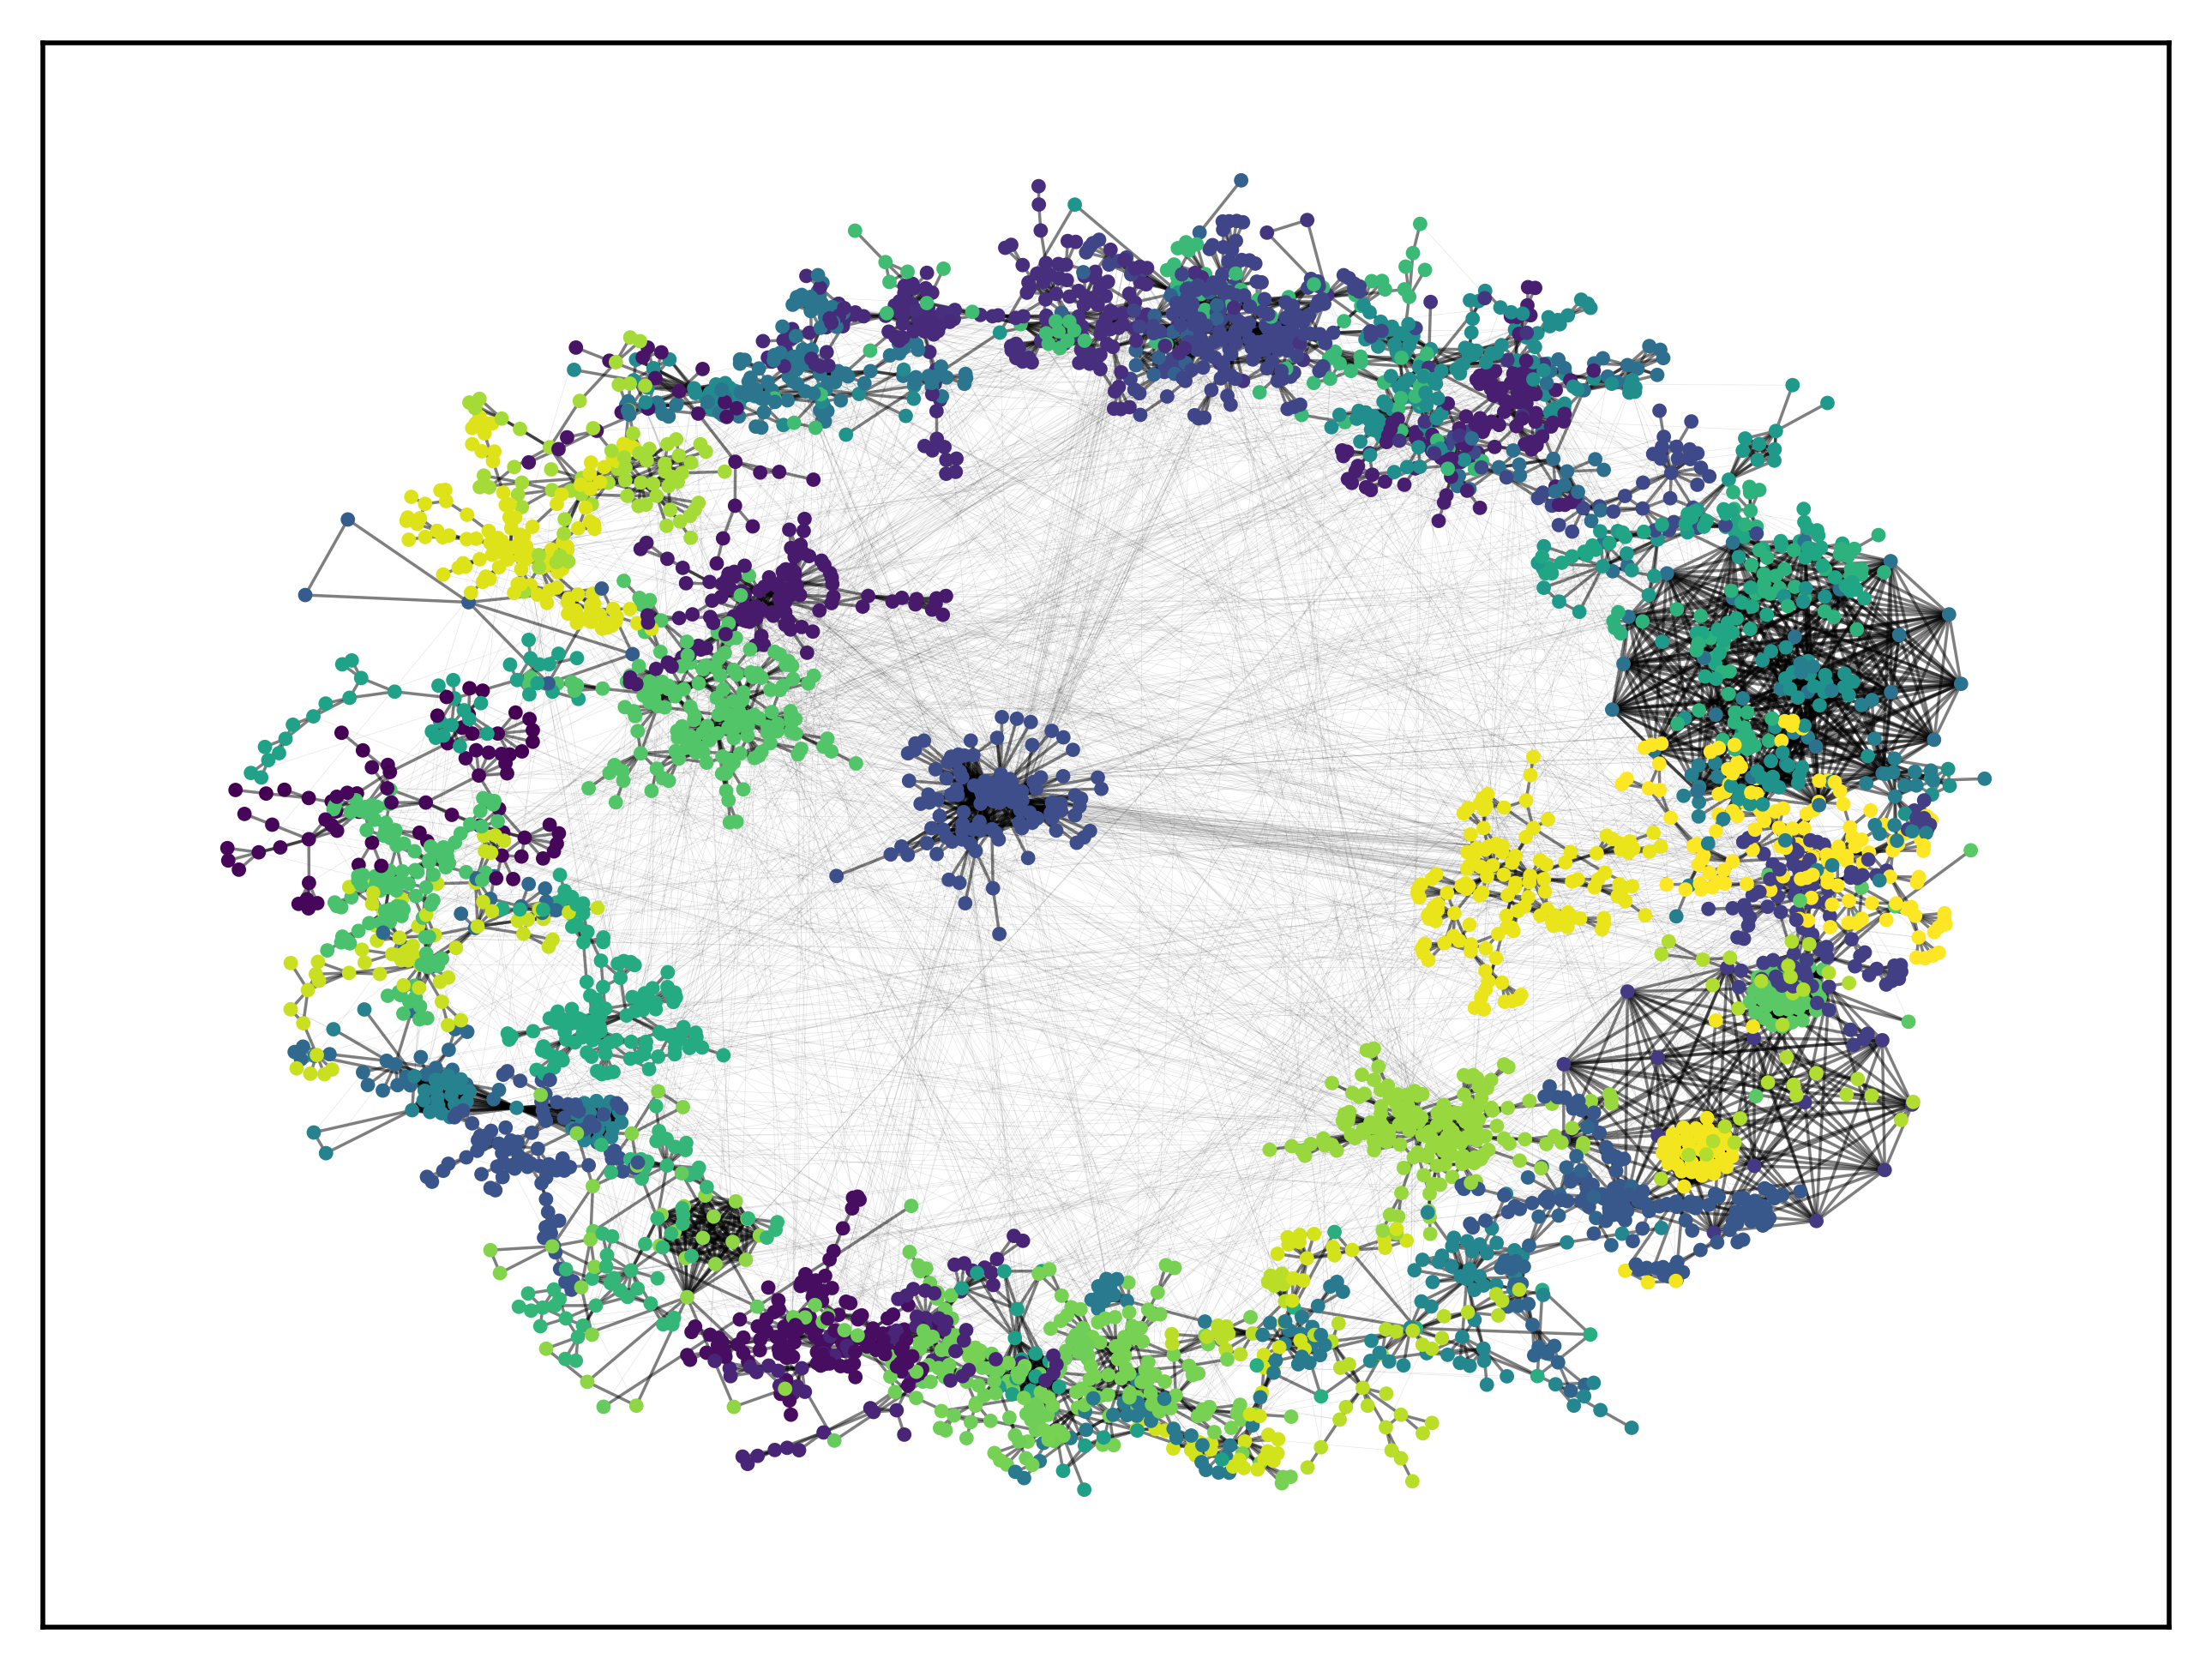

In [ ]:
from scripts.layout_class import CommunityLayout
from networkx.algorithms import community

LG2 = nx.Graph(LG)
layout = CommunityLayout(LG2,
                community_compression = 0.25,
                layout_algorithm = nx.spring_layout,
                layout_kwargs = {"k":75, "iterations":1000},
                community_algorithm = community.louvain_communities,
                community_kwargs = {"resolution":2, "seed":None}, save=False)
layout.display()


In [ ]:
from networkx.algorithms import community
len(list(community.asyn_lpa_communities(LG)))


675

In [ ]:
louvain = list(community.louvain_communities(LG, seed=10))
print(len(louvain))


41


In [ ]:
import numpy as np

lens = []
for i in louvain:
    lens.append(len(i))
print("smallest community: ", np.min(lens), "Largest community: ", np.max(lens))

smallest community:  7 Largest community:  234


Degree Assortativity

In [ ]:
#the average similarity of connections in the graph with respect to the node degree (how close high degree nodes are to each other, and low degree nodes are to each other)
d_a_c=nx.degree_assortativity_coefficient(LG)

#the average degree of the 'area' in which a certain node resides
a_n_d=nx.average_neighbor_degree(LG)

#How many edges do we need to remove to make the graph into two seperate graphs
a_d_c=nx.average_degree_connectivity(LG)

print(d_a_c)

0.6389971399620687


In [ ]:
from IPython.display import SVG
import numpy as np
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.visualization import svg_dendrogram
import scripts.community.community_louvain as cm

In [ ]:
cm.partition_at_level(dendrogram, level)

NameError: name 'dendrogram' is not defined

In [ ]:
dendrogram = cm.generate_dendrogram(LG)
for level in range(len(dendrogram) - 1) :
    print("partition at level", level, "is", partition_at_level(dendrogram, level))

partition at level 0 is {22: 2, 106: 2, 11183: 2, 15793: 2, 19440: 2, 22618: 17, 25043: 17, 24: 8, 3858: 8, 15774: 8, 19517: 8, 23161: 8, 26: 13, 1407: 13, 4550: 13, 11801: 13, 13096: 13, 13142: 13, 27: 21, 11114: 21, 19081: 21, 24726: 21, 25540: 21, 29: 23, 20243: 23, 45: 135, 570: 135, 773: 135, 1186: 135, 1653: 135, 2212: 135, 2741: 135, 2952: 135, 3372: 135, 4164: 135, 4180: 135, 4511: 135, 4513: 135, 6179: 135, 6610: 135, 6830: 135, 7956: 135, 8879: 135, 9785: 135, 11241: 135, 11472: 135, 12365: 135, 12496: 135, 12679: 135, 12781: 135, 12851: 135, 14540: 135, 14807: 135, 15003: 135, 15659: 135, 17655: 135, 17692: 135, 18719: 135, 18866: 135, 18894: 135, 19423: 135, 19961: 135, 20108: 135, 20562: 135, 20635: 135, 21012: 135, 21281: 135, 21508: 135, 21847: 135, 22691: 135, 22887: 135, 23293: 135, 24955: 135, 25346: 135, 25758: 135, 46: 135, 62: 718, 2710: 753, 6575: 574, 7579: 480, 13190: 480, 16148: 838, 23751: 718, 25469: 718, 65: 85, 357: 85, 358: 84, 11609: 85, 22100: 84, 23300:

In [ ]:
partition = cm.best_partition(G)

NetworkXError: Node 13 has no position.

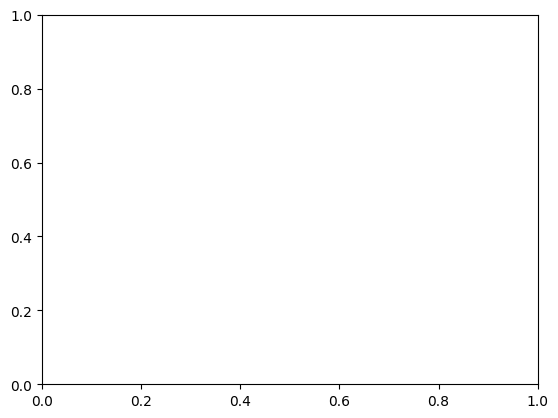

In [ ]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(LG)
count = 0.
for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(LG, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(LG,pos, alpha=0.5)
#plt.show()